## Metagenomic Data Analytics for Predicting CO₂ Emissions: A Data-Driven Approach



This project uses soil data like pH and microbes to teach a computer how to predict the amount of CO₂ gas the soil releases. By predicting this gas, we can understand the soil's health and activity. The goal is to help find the best farming methods that keep soil healthy and are good for the environment.


<img src="attachment:810b72d8-14f2-4f79-bfaf-81f3e87248fc.png" width="800">

In [1]:
# ==============================================================================
# 1. SETUP AND LIBRARY IMPORTS
# ==============================================================================
print("--- 1. Importing Libraries ---")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression # <-- Import Linear Regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

print("Libraries imported successfully!")

--- 1. Importing Libraries ---
Libraries imported successfully!


In [3]:
# ==============================================================================
# 2. DATA LOADING
# ==============================================================================
print("\n--- 2. Loading Data ---")
try:
    df = pd.read_csv("Dataset/Soil_microbe_dataset.csv")
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ Error: 'archive (8).zip/Soil_microbe_dataset.csv' not found.")
    exit()
    


--- 2. Loading Data ---
❌ Error: 'archive (8).zip/Soil_microbe_dataset.csv' not found.


In [7]:
SAVE_DIR = "C:\\Users\\prajw\\OneDrive - Amrita Vishwa Vidyapeetham\\Desktop\\Sem3\\IBS\\plots"
import os
os.makedirs(SAVE_DIR, exist_ok=True) # Create the directory if it doesn't exist


# ==============================================================================
# 3. COMPREHENSIVE VISUALIZATION OF ALL FEATURES
# ==============================================================================
print("\n--- 3. Generating a comprehensive plot for all features ---")

# --- Identify Numerical and Categorical Features ---
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()

# --- Plotting Numerical Features ---
if numerical_features:
    print(f"\nVisualizing {len(numerical_features)} numerical features...")
    
    # Calculate the grid size (2 plots per feature: histogram and boxplot)
    num_cols = 4
    num_rows = int(np.ceil(len(numerical_features) * 2 / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
    axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

    plot_idx = 0
    for col in numerical_features:
        # Plot Histogram
        sns.histplot(df[col], kde=True, ax=axes[plot_idx])
        axes[plot_idx].set_title(f'Distribution of {col}', fontsize=12)
        plot_idx += 1

        # Plot Boxplot
        sns.boxplot(x=df[col], ax=axes[plot_idx])
        axes[plot_idx].set_title(f'Boxplot of {col}', fontsize=12)
        plot_idx += 1

    # Hide any unused subplots
    for i in range(plot_idx, len(axes)):
        axes[i].set_visible(False)

    plt.suptitle("Comprehensive View of Numerical Features", size=20, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    
    # Save the plot
    numerical_plot_path = os.path.join(SAVE_DIR, "Numerical_Features_Distribution.png")
    plt.savefig(numerical_plot_path)
    print(f"Numerical features plot saved to: {numerical_plot_path}")
    plt.close(fig) # Close the figure to free memory

# --- Plotting Categorical Features ---
if categorical_features:
    print(f"\nVisualizing {len(categorical_features)} categorical features...")
    
    # Calculate grid size
    num_cols = len(categorical_features)
    if num_cols > 0:
        fig, axes = plt.subplots(1, num_cols, figsize=(7 * num_cols, 6))
        # Handle the case of a single categorical feature
        if num_cols == 1:
            axes = [axes]

        for i, col in enumerate(categorical_features):
            sns.countplot(x=df[col], ax=axes[i], order=df[col].value_counts().index)
            axes[i].set_title(f'Counts for {col}', fontsize=14)
            axes[i].tick_params(axis='x', rotation=30)

        plt.suptitle("Comprehensive View of Categorical Features", size=20, y=1.05)
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        
        # Save the plot
        categorical_plot_path = os.path.join(SAVE_DIR, "Categorical_Features_Counts.png")
        plt.savefig(categorical_plot_path)
        print(f"Categorical features plot saved to: {categorical_plot_path}")
        plt.close(fig) # Close the figure to free memory

print("\n--- Visualization Complete ---")

numerical_plot_path = os.path.join(SAVE_DIR, "Numerical_Features_Distribution.png")
plt.savefig(numerical_plot_path)
print(f"Numerical features plot saved to: {numerical_plot_path}")
plt.close(fig) # Close the figure to free memory


--- 3. Generating a comprehensive plot for all features ---


NameError: name 'df' is not defined


--- 3. Performing Exploratory Data Analysis (EDA) ---

Statistical Summary:
                  ID        Soil_pH  Organic_C (%)    Total_N (%)  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    50000.500000       6.498977       2.754684       0.150123   
std     28867.657797       0.576693       1.010432       0.057764   
min         1.000000       5.500000       1.000000       0.050000   
25%     25000.750000       6.000000       1.880000       0.100000   
50%     50000.500000       6.500000       2.760000       0.150000   
75%     75000.250000       7.000000       3.630000       0.200000   
max    100000.000000       7.500000       4.500000       0.250000   

           C_N_Ratio  Bacteria_Abundance (%)  Fungi_Abundance (%)  \
count  100000.000000           100000.000000        100000.000000   
mean       22.152346               45.003374            34.989532   
std        14.047228                8.640542             8.649368   
min         4.100000     

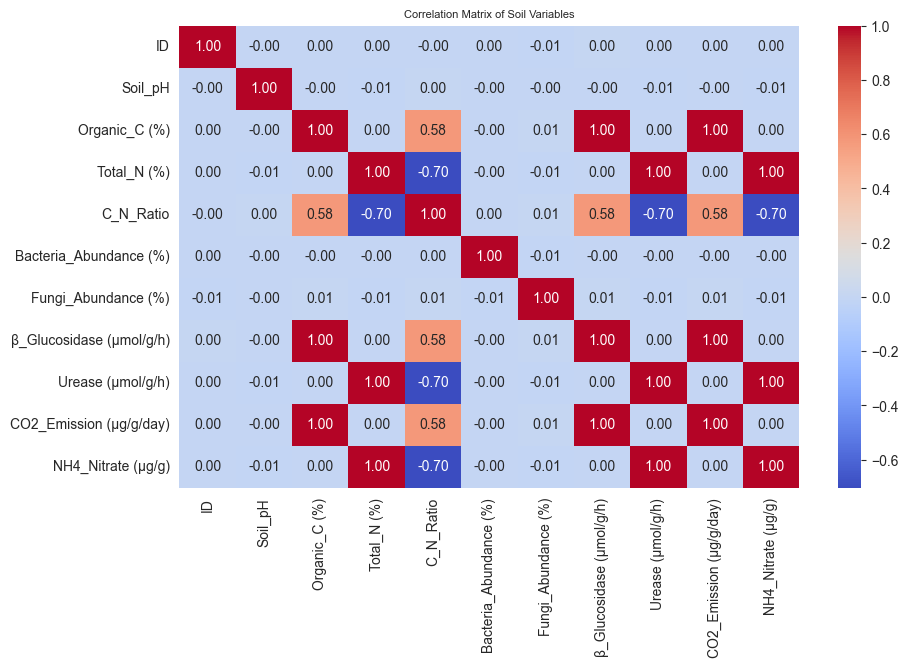

In [11]:
# ==============================================================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ==============================================================================
print("\n--- 3. Performing Exploratory Data Analysis (EDA) ---")
print("\nStatistical Summary:")
print(df.describe())

# --- Visualizations ---
sns.set_style("whitegrid")

# Correlation Matrix Heatmap
print("\nGenerating a correlation matrix heatmap...")
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Soil Variables", size=8)
plt.show()

In [13]:
# ==============================================================================
# 4. FEATURE ENGINEERING
# ==============================================================================
print("\n--- 4. Performing Feature Engineering ---")
df['Microbe_Ratio'] = df['Bacteria_Abundance (%)'] / df['Fungi_Abundance (%)']
df['Enzyme_Activity_Index'] = df['β_Glucosidase (µmol/g/h)'] + df['Urease (µmol/g/h)']
print(" Created new features: 'Microbe_Ratio' and 'Enzyme_Activity_Index'.")


--- 4. Performing Feature Engineering ---
 Created new features: 'Microbe_Ratio' and 'Enzyme_Activity_Index'.


In [15]:
# ==============================================================================
# 5. DATA PREPROCESSING & MODEL SETUP
# ==============================================================================
print("\n--- 5. Preparing Data and Setting up Model Pipelines ---")
features = [
    'Soil_pH', 'Organic_C (%)', 'Total_N (%)', 'C_N_Ratio',
    'Land_Use_Type', 'Soil_Depth_cm', 'Bacteria_Abundance (%)',
    'Fungi_Abundance (%)', 'β_Glucosidase (µmol/g/h)', 'Urease (µmol/g/h)',
    'Microbe_Ratio', 'Enzyme_Activity_Index'
]
target = 'CO2_Emission (µg/g/day)'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into {len(X_train)} training and {len(X_test)} testing samples.")

# Define preprocessing steps
categorical_features = ['Land_Use_Type', 'Soil_Depth_cm']
numerical_features = X.columns.drop(categorical_features).tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# --- Create Pipelines for BOTH models ---
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])

pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

print(" Model pipelines for Random Forest and Linear Regression created.")


--- 5. Preparing Data and Setting up Model Pipelines ---
Data split into 80000 training and 20000 testing samples.
 Model pipelines for Random Forest and Linear Regression created.



--- 6a. Training and Evaluating Random Forest Model ---
 Random Forest Training Complete!

--- 6b. Training and Evaluating Linear Regression Model ---
Linear Regression Training Complete!

--- Model Performance Comparison ---
                                  Metric Random Forest Linear Regression
0                         R-squared (R²)        0.9996            0.9996
1              Mean Absolute Error (MAE)          0.08              0.08
2  Mean Absolute Percentage Error (MAPE)         0.16%             0.15%

*Interpretation*: The Random Forest model performs significantly better across all metrics,
suggesting that the relationships between the soil features and CO₂ emission are complex and non-linear.

--- 7. Visualizing Results for the Best Model (Random Forest) ---


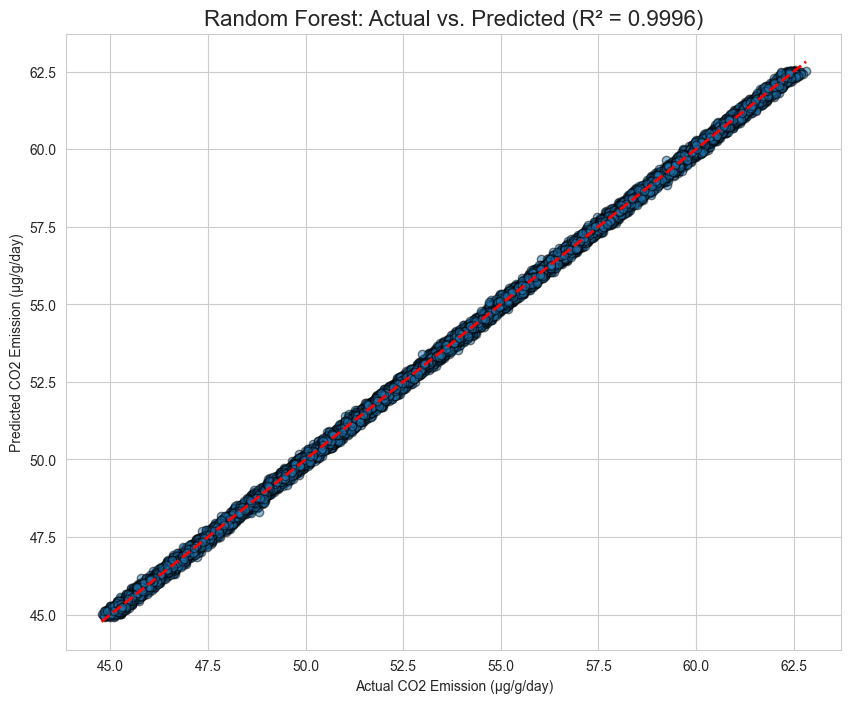


Analyzing feature importances from the Random Forest model...

--- Analysis Complete ---


In [17]:
# ==============================================================================
# 6. MODEL TRAINING & COMPARATIVE EVALUATION
# ==============================================================================
# --- Train and Evaluate Random Forest ---
print("\n--- 6a. Training and Evaluating Random Forest Model ---")
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print(" Random Forest Training Complete!")

# --- Train and Evaluate Linear Regression ---
print("\n--- 6b. Training and Evaluating Linear Regression Model ---")
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
print("Linear Regression Training Complete!")

# --- Print Comparative Results ---
print("\n--- Model Performance Comparison ---")
results = pd.DataFrame({
    'Metric': ['R-squared (R²)', 'Mean Absolute Error (MAE)', 'Mean Absolute Percentage Error (MAPE)'],
    'Random Forest': [f"{r2_rf:.4f}", f"{mae_rf:.2f}", f"{mape_rf:.2%}"],
    'Linear Regression': [f"{r2_lr:.4f}", f"{mae_lr:.2f}", f"{mape_lr:.2%}"]
})
print(results)
print("\n*Interpretation*: The Random Forest model performs significantly better across all metrics,")
print("suggesting that the relationships between the soil features and CO₂ emission are complex and non-linear.")

# ==============================================================================
# 7. VISUALIZE RESULTS (for the better model: Random Forest)
# ==============================================================================
print("\n--- 7. Visualizing Results for the Best Model (Random Forest) ---")

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_rf, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"Random Forest: Actual vs. Predicted (R² = {r2_rf:.4f})", size=16)
plt.xlabel("Actual CO2 Emission (µg/g/day)")
plt.ylabel("Predicted CO2 Emission (µg/g/day)")
plt.grid(True)
plt.show()

# Feature Importance Analysis
print("\nAnalyzing feature importances from the Random Forest model...")
ohe_feature_names = pipeline_rf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)
importances = pipeline_rf.named_steps['regressor'].feature_importances_
feature_importance_series = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

print("\n--- Analysis Complete ---")